In [1]:
import h5py
import wradlib
import matplotlib.pyplot as plt
from PIL import Image
import skimage.measure
from skimage.measure import block_reduce
import numpy as np
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri
from rpy2.robjects import default_converter
from rpy2.robjects import pandas2ri
import rpy2.robjects as ro
import pandas
import cv2
from io import BytesIO
import time

bioRad = importr("bioRad")
viridis = importr("viridis")
ggplot = importr('ggplot2')

C:\Users\asdds\anaconda3\lib\site-packages\ecmwflibs\__init__.py:83: UserWarning: DLL load failed while importing _ecmwflibs: The specified procedure could not be found.
  warnings.warn(str(e))
C:\Users\asdds\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


<h1> VRAD

In [25]:
# The path of the file
filename = r"C:\Users\asdds\Documents\ilya\work\Knafei_Silon\UNET-flocks-detection-main\train_test\506 birds 2\1314ISR-PPIVol-20231014-015350-b0e1.hdf"

In [26]:
# The name of the image to be generated in a folder
imagename = 'image.tiff'

In [27]:
# This method takes a list of paths (can use glob.glob) and outputs an array with the VRAD images
def hdf2ppi(hdf_list, max_range=50000, sz=(256, 256), box=(29, 29, 450, 450)):  # turns a list of hdf directories to ppi images

    with ro.default_converter:
        ppi_array = []
        for hdf_file in hdf_list:
            pvol = bioRad.read_pvolfile(hdf_file)  # read the hdf file
            scan = pvol[2][0][2][2]
            ppi = bioRad.project_as_ppi(scan, range_max=max_range)  # turn into ppi
            ro.globalenv['ppi'] = ppi
            
            # Change VRAD to DBZH to generate dBz instead of VRAD
            r(f'''
            p<-plot(ppi,  param="VRAD",frame.plot=F)+ 
                viridis::scale_fill_viridis(name = "VRAD")+
                theme(panel.background = element_rect(fill = "black")) +
                theme(panel.border = element_blank(),
                      panel.grid.major = element_blank(),
                      panel.grid.minor = element_blank(),
                      legend.position = "none",
                      axis.title = element_blank(),
                      axis.text = element_blank(),
                      axis.ticks = element_blank())+
                geom_text(x=0, y=-53000,colour="White" ,label=ppi$datetime)

            tiff('{imagename}')
            print(p)
            dev.off()
            ''')

            raw = Image.open(imagename)
            raw = raw.crop(box)
            raw = raw.resize(sz, Image.NEAREST)
            img = np.array(raw)

            ppi_array.append(img / 255.)
        return ppi_array

In [28]:
vrad_array = hdf2ppi([filename])

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


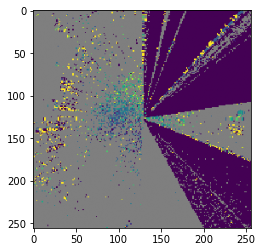

In [29]:
plt.imshow(vrad_array[0])